# Necessary Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Ingestion


In [4]:
data=pd.read_csv('F:/ML Project/Data/pollution_2000_2023.csv')
data

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665409,665409,2023-06-26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.043941,0.050,12,46,...,0,0.0,0.117391,0.3,7,0.0,2.282609,4.3,6,4
665410,665410,2023-06-27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.046235,0.054,12,50,...,0,0.0,0.091667,0.2,8,0.0,2.283333,5.2,6,5
665411,665411,2023-06-28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.046588,0.055,7,51,...,0,0.0,0.091667,0.2,6,0.0,2.487500,4.8,19,4
665412,665412,2023-06-29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.048765,0.056,9,54,...,0,0.0,0.052174,0.1,8,0.0,2.086957,4.1,8,4


# Data Understanding

In [5]:
data.shape

(665414, 22)

In [6]:
data.isna().sum()

Unnamed: 0           0
Date                 0
Address              0
State                0
County               0
City                 0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'Date', 'Address', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')

In [8]:
data[data.duplicated()]

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI


In [9]:
data.dtypes

Unnamed: 0             int64
Date                  object
Address               object
State                 object
County                object
City                  object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
dtype: object

# EDA

### Problem Statement 1:How have the average annual levels of NO2, SO2, CO, and O3 changed from 2000 to 2022?

In [10]:
data.Date=pd.to_datetime(data.Date)
data.dtypes

Unnamed: 0                    int64
Date                 datetime64[ns]
Address                      object
State                        object
County                       object
City                         object
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                      float64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
dtype: object

In [11]:
data["year"]=data.Date.dt.year
filtered=data[(data['year']==2000) | (data['year']==2022)]
selected_columns=filtered[['year','O3 AQI','CO AQI','SO2 AQI','NO2 AQI']]
answer=selected_columns.groupby('year').mean()
print(answer)

         O3 AQI    CO AQI    SO2 AQI    NO2 AQI
year                                           
2000  40.572174  9.481924  14.264280  30.954530
2022  38.930351  3.834721   0.743427  18.103992


##### Visualization

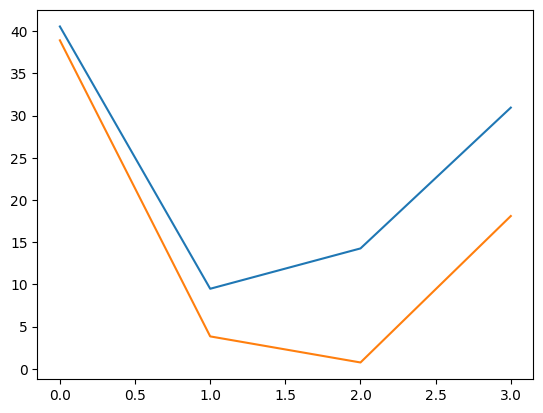

In [12]:
x=[40.572174,9.481924,14.264280,30.954530]
y=[38.930351,3.834721,0.743427,18.103992]
plt.plot(x)
plt.plot(y)
plt.show()